Make tidal boundary conditions for the Northern boundary in Johnstone Strait. Use data from Webtide and from Thomson & Huggett (1980) to make netcdf input files.

Edited by Nancy in March, 2014. Modified measured grid rotation ($129^\circ$ instead of $-51^\circ$) and error in S2 elevation calculation.

Edited by Susan in April, 2014.  Modified grid rotation to rotate versus across grid rather than up grid.  Corrects phases of currents.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import webtide_tools

In [2]:
#from Table 2, Thomson & Huggett (1980)
#Tidal height harmonics
#lats and lons found by estimating locations shown in Fig 4 with Google Maps

TGS_Jun = {'O1amp':0.3249,'O1pha_PST':130.3,
           'K1amp':0.5491,'K1pha_PST':138.9,
           'M2amp':1.2196,'M2pha_PST':37.3,
           'S2amp':0.3966,'S2pha_PST':56.6,
           'Lat':50.470945,'Lon':-126.23826}

TGN_Jun = {'O1amp':0.3250,'O1pha_PST':129.4,
           'K1amp':0.5504,'K1pha_PST':138.5,
           'M2amp':1.2086,'M2pha_PST':36.8,
           'S2amp':0.3931,'S2pha_PST':56.6,
           'Lat':50.498579,'Lon':-126.213026}

TGW_Jan = {'O1amp':0.3161,'O1pha_PST':127.5,
           'K1amp':0.5466,'K1pha_PST':138.7,
           'M2amp':1.2453,'M2pha_PST':28.8,
           'S2amp':0.4504,'S2pha_PST':51.2,
           'Lat':50.574707,'Lon':-126.790431}

TGS_Feb = {'O1amp':0.3198,'O1pha_PST':126.8,
           'K1amp':0.5696,'K1pha_PST':139.4,
           'M2amp':1.2218,'M2pha_PST':37.5,
           'S2amp':0.4474,'S2pha_PST':59.1,
           'Lat':50.470945,'Lon':-126.23826}

TGE_Feb = {'O1amp':0.3376,'O1pha_PST':127.5,
           'K1amp':0.5881,'K1pha_PST':140.8,
           'M2amp':1.1690,'M2pha_PST':41.1,
           'S2amp':0.4368,'S2pha_PST':62.1,
           'Lat':50.442638,'Lon':-125.97064}


In [3]:
#need to convert phases from relative to 120 degrees W to GMT
#for this conversion, we need to use the frequency of each component (in hours)
freqs = {'M2':12.42, 'S2':12.00, 'O1':25.82, 'K1':23.93}

In [4]:
#For details, see Manual for Tide Heights Analysis and Prediction by M.G.G. Foreman, 
#Pacific Marine Science Report 77-10, IOS, 1977 (Revised 2004), 
#Section 2.3.1 Astronomical argument and Greenwich phase lag
# available here: ftp://canuck.seos.uvic.ca/docs/MFTides/heights.pdf
# or here: http://www.pac.dfo-mpo.gc.ca/science/oceans/tidal-marees/index-eng.html

#Now, 120 degrees W (Pacific Standard Time) is 8 hours different to GMT 
#So to convert M2 phase from PST to GMT:
#      GMT_pha = PST_pha - (-8hours)*(1/12.42hours)*360degrees

#TGS_Jun
TGS_Jun['O1pha_GMT'] = TGS_Jun['O1pha_PST']-(-8.0)*(1.0/freqs['O1'])*360
TGS_Jun['K1pha_GMT'] = TGS_Jun['K1pha_PST']-(-8.0)*(1.0/freqs['K1'])*360
TGS_Jun['M2pha_GMT'] = TGS_Jun['M2pha_PST']-(-8.0)*(1.0/freqs['M2'])*360
TGS_Jun['S2pha_GMT'] = TGS_Jun['S2pha_PST']-(-8.0)*(1.0/freqs['S2'])*360

#TGN_Jun
TGN_Jun['O1pha_GMT'] = TGN_Jun['O1pha_PST']-(-8.0)*(1.0/freqs['O1'])*360
TGN_Jun['K1pha_GMT'] = TGN_Jun['K1pha_PST']-(-8.0)*(1.0/freqs['K1'])*360
TGN_Jun['M2pha_GMT'] = TGN_Jun['M2pha_PST']-(-8.0)*(1.0/freqs['M2'])*360
TGN_Jun['S2pha_GMT'] = TGN_Jun['S2pha_PST']-(-8.0)*(1.0/freqs['S2'])*360

#TGW_Jan
TGW_Jan['O1pha_GMT'] = TGW_Jan['O1pha_PST']-(-8.0)*(1.0/freqs['O1'])*360
TGW_Jan['K1pha_GMT'] = TGW_Jan['K1pha_PST']-(-8.0)*(1.0/freqs['K1'])*360
TGW_Jan['M2pha_GMT'] = TGW_Jan['M2pha_PST']-(-8.0)*(1.0/freqs['M2'])*360
TGW_Jan['S2pha_GMT'] = TGW_Jan['S2pha_PST']-(-8.0)*(1.0/freqs['S2'])*360

#TGS_Feb
TGS_Feb['O1pha_GMT'] = TGS_Feb['O1pha_PST']-(-8.0)*(1.0/freqs['O1'])*360
TGS_Feb['K1pha_GMT'] = TGS_Feb['K1pha_PST']-(-8.0)*(1.0/freqs['K1'])*360
TGS_Feb['M2pha_GMT'] = TGS_Feb['M2pha_PST']-(-8.0)*(1.0/freqs['M2'])*360
TGS_Feb['S2pha_GMT'] = TGS_Feb['S2pha_PST']-(-8.0)*(1.0/freqs['S2'])*360

#TGE_Feb
TGE_Feb['O1pha_GMT'] = TGE_Feb['O1pha_PST']-(-8.0)*(1.0/freqs['O1'])*360
TGE_Feb['K1pha_GMT'] = TGE_Feb['K1pha_PST']-(-8.0)*(1.0/freqs['K1'])*360
TGE_Feb['M2pha_GMT'] = TGE_Feb['M2pha_PST']-(-8.0)*(1.0/freqs['M2'])*360
TGE_Feb['S2pha_GMT'] = TGE_Feb['S2pha_PST']-(-8.0)*(1.0/freqs['S2'])*360


In [5]:
#Compare the harmonics to Webtide harmonics at 50.556435 deg N, -126.7717 deg W
import pandas
#webtide = pandas.read_csv('/ocean/klesouef/meopar/tools/I_ForcingFiles/Tides/webtide_point_johnstone_strait.csv',
                          #index_col=0,skiprows=2)
webtide = pandas.read_csv('webtide_point_johnstone_strait.csv',
                          index_col=0,skiprows=2)
webtide = webtide.rename(columns={'Amplitude (m)':'amp','Phase (deg GMT)':'pha'})
print webtide


             Longitude   Latitude       amp         pha
Constituent                                            
O1           -126.7717  50.556435  0.311897  242.711639
P1           -126.7717  50.556435  0.161873  256.887977
Q1           -126.7717  50.556435  0.051117  232.075989
K1           -126.7717  50.556435  0.522911  260.110718
K2           -126.7717  50.556435  0.104906  283.723050
N2           -126.7717  50.556435  0.260498  240.832452
M2           -126.7717  50.556435  1.253263  263.723173
S2           -126.7717  50.556435  0.358527  292.054419


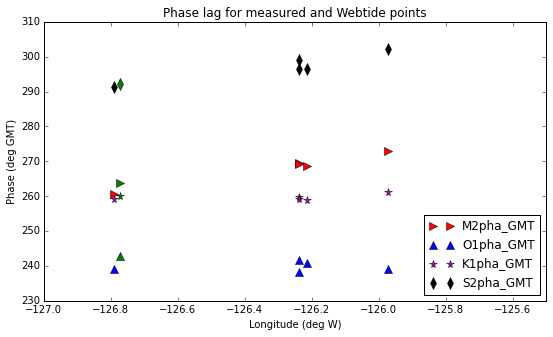

In [6]:
#Plot them to check how it looks
#the channel is mostly aligned east-west, so plot along the channel
plt.figure(figsize=[9,5])
pha = 'M2pha_GMT','O1pha_GMT','K1pha_GMT','S2pha_GMT'
cols = 'r','b','m','k','g'
marks = '>','^','*','d'

for t in range(0,len(pha)):
    plt.plot([TGW_Jan['Lon'],TGS_Feb['Lon'],TGS_Jun['Lon'],TGN_Jun['Lon'],TGE_Feb['Lon']],
             [TGW_Jan[pha[t]],TGS_Feb[pha[t]],TGS_Jun[pha[t]],TGN_Jun[pha[t]],TGE_Feb[pha[t]]],
             cols[t],marker=marks[t],markersize=8,linestyle='none')
pha = 'M2','O1','K1','S2'
nums = [6,0,3,7]
marknum = 0
for t in nums:
    plt.plot(webtide['Longitude'][t],webtide.pha[t],color='green',marker=marks[marknum],markersize=8,linestyle='none')
    marknum = marknum+1
plt.xlim((-127, -125.5))
plt.xlabel('Longitude (deg W)')
plt.ylabel('Phase (deg GMT)')
plt.legend(('M2pha_GMT','O1pha_GMT','K1pha_GMT','S2pha_GMT'),loc=4)
plt.title('Phase lag for measured and Webtide points')


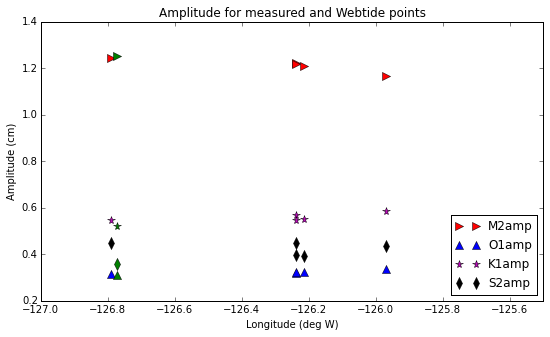

In [7]:
#Plot them to check how it looks
#the channel is mostly aligned east-west, so plot along the channel
plt.figure(figsize=[9,5])
amp = 'M2amp','O1amp','K1amp','S2amp'
cols = 'r','b','m','k','g'
marks = '>','^','*','d'

for t in range(0,len(pha)):
    plt.plot([TGW_Jan['Lon'],TGS_Feb['Lon'],TGS_Jun['Lon'],TGN_Jun['Lon'],TGE_Feb['Lon']],
             [TGW_Jan[amp[t]],TGS_Feb[amp[t]],TGS_Jun[amp[t]],TGN_Jun[amp[t]],TGE_Feb[amp[t]]],
             cols[t],marker=marks[t],markersize=8,linestyle='none')
amp = 'M2','O1','K1','S2'
nums = [6,0,3,7]
marknum = 0
for t in nums:
    plt.plot(webtide['Longitude'][t],webtide.amp[t],color='green',marker=marks[marknum],markersize=8,linestyle='none')
    marknum = marknum+1
plt.xlim((-127, -125.5))
plt.xlabel('Longitude (deg W)')
plt.ylabel('Amplitude (cm)')
plt.legend(('M2amp','O1amp','K1amp','S2amp'),loc=4)
plt.title('Amplitude for measured and Webtide points')


In [8]:
#get the measured tidal currents in Johnstone Strait
#table 1 of Thomson & Huggett (1980)
#thomson = pandas.read_csv('/ocean/klesouef/meopar/tools/I_ForcingFiles/Tides/thomson_obs_1980_johnstone_strait.csv')
thomson = pandas.read_csv('thomson_obs_1980_johnstone_strait.csv')
thomson = thomson.rename(columns={'K1 amp (cm/s)':'k1amp','K1 phase (deg relative to 120deg W)':'k1pha_PST',
                                  'M2 amp (cm/s)':'m2amp','M2 phase (deg relative to 120deg W)':'m2pha_PST',})
thomson.k1amp[thomson.k1amp>100] = float('NaN')
thomson.k1pha_PST[thomson.k1pha_PST>1000] = float('NaN')
print thomson

    Station  depth     U  angle  k1amp  k1pha_PST  m2amp  m2pha_PST
0         1    120   3.0    145    5.3      170.2   28.4       11.9
1         2     15  26.7    175    7.2      100.5   23.6       34.7
2         2     15  23.6    174   11.0       88.6   21.8       40.8
3         2     75  13.5    167    8.4       94.5   23.8       38.3
4         2     75  15.0    170   12.5       83.0   22.2       50.7
5         2    150   6.6    333   10.6       58.5   35.6       45.1
6         2    150   7.3    344   15.9       39.8   36.9       47.2
7         2    225  11.8    350   13.1       24.9   49.0       38.7
8         2    295   7.4    351    9.7       19.4   33.2       38.3
9         3     15  24.2    163    6.8       74.3   31.4       29.7
10        3     15  23.8    176    NaN        NaN   25.6       37.3
11        3     20  26.4    179    8.1       87.6   25.2       34.5
12        3     23  29.6    176    7.4       94.6   28.0       32.4
13        3     23  23.1    172    6.3       82.

/homes/anu/sallen/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/homes/anu/sallen/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
#convert the GMT phase to PST phase and rename it to avoid confusion
thomson.k1pha_PST = thomson.k1pha_PST-(-8.0)*(1.0/freqs['K1'])*360
thomson.m2pha_PST = thomson.m2pha_PST-(-8.0)*(1.0/freqs['M2'])*360
thomson = thomson.rename(columns={'k1pha_PST':'k1pha_GMT','m2pha_PST':'m2pha_GMT'})
print thomson

    Station  depth     U  angle  k1amp   k1pha_GMT  m2amp   m2pha_GMT
0         1    120   3.0    145    5.3  290.551024   28.4  243.784058
1         2     15  26.7    175    7.2  220.851024   23.6  266.584058
2         2     15  23.6    174   11.0  208.951024   21.8  272.684058
3         2     75  13.5    167    8.4  214.851024   23.8  270.184058
4         2     75  15.0    170   12.5  203.351024   22.2  282.584058
5         2    150   6.6    333   10.6  178.851024   35.6  276.984058
6         2    150   7.3    344   15.9  160.151024   36.9  279.084058
7         2    225  11.8    350   13.1  145.251024   49.0  270.584058
8         2    295   7.4    351    9.7  139.751024   33.2  270.184058
9         3     15  24.2    163    6.8  194.651024   31.4  261.584058
10        3     15  23.8    176    NaN         NaN   25.6  269.184058
11        3     20  26.4    179    8.1  207.951024   25.2  266.384058
12        3     23  29.6    176    7.4  214.951024   28.0  264.284058
13        3     23  

Plot the location of all measurements on our grid


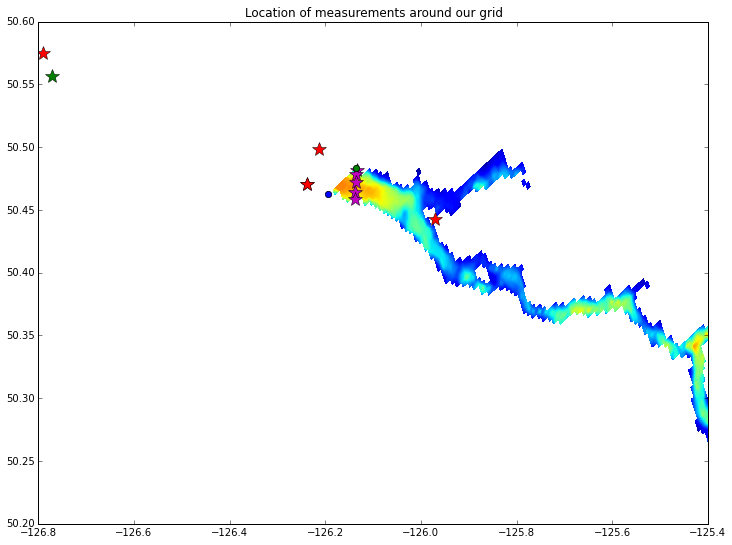

In [12]:
import netCDF4 as NC
#grid = NC.Dataset('/ocean/klesouef/meopar/nemo-forcing/grid/bathy_meter_SalishSea2.nc','r')
#grid = NC.Dataset('../../../nemo-forcing/grid/bathy_meter_SalishSea2.nc','r')
grid = NC.Dataset('../../../NEMO-forcing/grid/bathy_meter_SalishSea2.nc','r')
bathy = grid.variables['Bathymetry']
lat = grid.variables['nav_lat']
lon = grid.variables['nav_lon']
plt.figure(figsize=(12,9))
plt.contourf(lon[:],lat[:],bathy[:],range(4,420))
plt.xlim((-126.8,-125.4))
plt.ylim((50.2,50.6))

#I need the lat/long of each of the current measurement points
#From Google Maps, I estimate the following locations:
#Station 1
plt.plot(-126.133747,50.482197,'m*',markersize=15)
#Station 2
plt.plot(-126.135936,50.478701,'m*',markersize=15)
#Station 3
plt.plot(-126.136451,50.472256,'m*',markersize=15)
#Station 4
plt.plot(-126.137567,50.464225,'m*',markersize=15)
#Station 5
plt.plot(-126.138554,50.458815,'m*',markersize=15)
#Webtide point
plt.plot(-126.7717,50.556435,'g*',markersize=15)
#current measurement points
plt.plot([TGW_Jan['Lon'],TGS_Feb['Lon'],TGS_Jun['Lon'],TGN_Jun['Lon'],TGE_Feb['Lon']],
         [TGW_Jan['Lat'],TGS_Feb['Lat'],TGS_Jun['Lat'],TGN_Jun['Lat'],TGE_Feb['Lat']],'r*',markersize=15)

#also mark the edge points
import numpy as np
i=np.array([897,897])
j=np.array([37,48])
plt.plot(lon[i,j],lat[i,j],'o')

plt.title('Location of measurements around our grid')

#so the current measurements are pretty much exactly at our boundary, YAY!
#and the TGN and TGS stations are pretty close for the water elevation 

Now, we need to get depth integrated currents for putting into NEMO. Assume each current meter represents the water from halfway between it and the current meter above it, down to halfway between it and the current meter below it

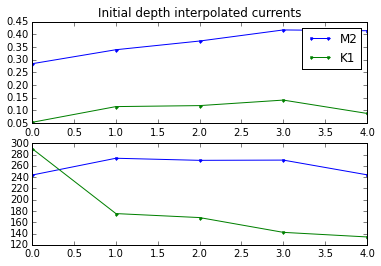

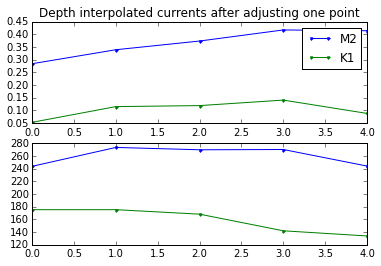

In [13]:
#for K1
K1_amp_depth_int = np.zeros((5,1))
K1_pha_depth_int = np.zeros((5,1))

#Station 1: only one point, therefore this represents all depths
K1_amp_depth_int[0,0] = thomson.k1amp[thomson.Station == 1]
K1_pha_depth_int[0,0] = thomson.k1pha_GMT[thomson.Station == 1]

#Station 2: depth integrate amplitude and phase
K1_amp_depth_int[1,0] = np.sum([np.mean(thomson.k1amp[np.logical_and(thomson.Station == 2,thomson.depth == 15)])*45,
                                np.mean(thomson.k1amp[np.logical_and(thomson.Station == 2,thomson.depth == 75)])*67.5,
                                np.mean(thomson.k1amp[np.logical_and(thomson.Station == 2,thomson.depth == 150)])*75,
                                np.mean(thomson.k1amp[np.logical_and(thomson.Station == 2,thomson.depth == 225)])*72.5,
                                np.mean(thomson.k1amp[np.logical_and(thomson.Station == 2,thomson.depth == 295)])*40])/300.0
K1_pha_depth_int[1,0]= np.sum([np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 2,thomson.depth == 15)])*45,
                               np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 2,thomson.depth == 75)])*67.5,
                               np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 2,thomson.depth == 150)])*75,
                               np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 2,thomson.depth == 225)])*72.5,
                               np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 2,thomson.depth == 295)])*40])/300.0

#Station 3: depth integrate amplitude and phase
K1_amp_depth_int[2,0] = np.sum([np.mean(thomson.k1amp[np.logical_and(thomson.Station == 3,thomson.depth == 15)])*17.5,
                                np.mean(thomson.k1amp[np.logical_and(thomson.Station == 3,thomson.depth == 20)])*4,
                                np.mean(thomson.k1amp[np.logical_and(thomson.Station == 3,thomson.depth == 23)])*27.5,
                                np.mean(thomson.k1amp[np.logical_and(thomson.Station == 3,thomson.depth == 75)])*63.5,
                                np.mean(thomson.k1amp[np.logical_and(thomson.Station == 3,thomson.depth == 150)])*62.5,
                                np.mean(thomson.k1amp[np.logical_and(thomson.Station == 3,thomson.depth == 200)])*37.5,
                                np.mean(thomson.k1amp[np.logical_and(thomson.Station == 3,thomson.depth == 225)])*25,
                                np.mean(thomson.k1amp[np.logical_and(thomson.Station == 3,thomson.depth == 250)])*25,
                                np.mean(thomson.k1amp[np.logical_and(thomson.Station == 3,thomson.depth == 275)])*37.5])/300.0

K1_pha_depth_int[2,0] = np.sum([np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 15)])*17.5,
                                np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 20)])*4,
                                np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 23)])*27.5,
                                np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 75)])*63.5,
                                np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 150)])*62.5,
                                np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 200)])*37.5,
                                np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 225)])*25,
                                np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 250)])*25,
                                np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 275)])*37.5])/300.0

#Station 4: depth integrate amplitude and phase
K1_amp_depth_int[3,0] = np.sum([np.mean(thomson.k1amp[np.logical_and(thomson.Station == 4,thomson.depth == 75)])*112.5,
                                np.mean(thomson.k1amp[np.logical_and(thomson.Station == 4,thomson.depth == 150)])*87.5,
                                np.mean(thomson.k1amp[np.logical_and(thomson.Station == 4,thomson.depth == 250)])*100])/300.0

K1_pha_depth_int[3,0] = np.sum([np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 4,thomson.depth == 75)])*112.5,
                                np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 4,thomson.depth == 150)])*87.5,
                                np.mean(thomson.k1pha_GMT[np.logical_and(thomson.Station == 4,thomson.depth == 250)])*100])/300.0

#Station 5: only one point, therefore this represents all depths 
K1_amp_depth_int[4,0] = thomson.k1amp[thomson.Station == 5]
K1_pha_depth_int[4,0] = thomson.k1pha_GMT[thomson.Station == 5]


#for M2
M2_amp_depth_int = np.zeros((5,1))
M2_pha_depth_int = np.zeros((5,1))

#Station 1: only one point, therefore this represents all depths
M2_amp_depth_int[0,0] = thomson.m2amp[thomson.Station == 1]
M2_pha_depth_int[0,0] = thomson.m2pha_GMT[thomson.Station == 1]

#Station 2: depth integrate amplitude and phase
M2_amp_depth_int[1,0] = np.sum([np.mean(thomson.m2amp[np.logical_and(thomson.Station == 2,thomson.depth == 15)])*45,
                                np.mean(thomson.m2amp[np.logical_and(thomson.Station == 2,thomson.depth == 75)])*67.5,
                                np.mean(thomson.m2amp[np.logical_and(thomson.Station == 2,thomson.depth == 150)])*75,
                                np.mean(thomson.m2amp[np.logical_and(thomson.Station == 2,thomson.depth == 225)])*72.5,
                                np.mean(thomson.m2amp[np.logical_and(thomson.Station == 2,thomson.depth == 295)])*40])/300.0
M2_pha_depth_int[1,0]= np.sum([np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 2,thomson.depth == 15)])*45,
                               np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 2,thomson.depth == 75)])*67.5,
                               np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 2,thomson.depth == 150)])*75,
                               np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 2,thomson.depth == 225)])*72.5,
                               np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 2,thomson.depth == 295)])*40])/300.0

#Station 3: depth integrate amplitude and phase
M2_amp_depth_int[2,0] = np.sum([np.mean(thomson.m2amp[np.logical_and(thomson.Station == 3,thomson.depth == 15)])*17.5,
                                np.mean(thomson.m2amp[np.logical_and(thomson.Station == 3,thomson.depth == 20)])*4,
                                np.mean(thomson.m2amp[np.logical_and(thomson.Station == 3,thomson.depth == 23)])*27.5,
                                np.mean(thomson.m2amp[np.logical_and(thomson.Station == 3,thomson.depth == 75)])*63.5,
                                np.mean(thomson.m2amp[np.logical_and(thomson.Station == 3,thomson.depth == 150)])*62.5,
                                np.mean(thomson.m2amp[np.logical_and(thomson.Station == 3,thomson.depth == 200)])*37.5,
                                np.mean(thomson.m2amp[np.logical_and(thomson.Station == 3,thomson.depth == 225)])*25,
                                np.mean(thomson.m2amp[np.logical_and(thomson.Station == 3,thomson.depth == 250)])*25,
                                np.mean(thomson.m2amp[np.logical_and(thomson.Station == 3,thomson.depth == 275)])*37.5])/300.0

M2_pha_depth_int[2,0] = np.sum([np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 15)])*17.5,
                                np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 20)])*4,
                                np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 23)])*27.5,
                                np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 75)])*63.5,
                                np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 150)])*62.5,
                                np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 200)])*37.5,
                                np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 225)])*25,
                                np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 250)])*25,
                                np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 3,thomson.depth == 275)])*37.5])/300.0

#Station 4: depth integrate amplitude and phase
M2_amp_depth_int[3,0] = np.sum([np.mean(thomson.m2amp[np.logical_and(thomson.Station == 4,thomson.depth == 75)])*112.5,
                                np.mean(thomson.m2amp[np.logical_and(thomson.Station == 4,thomson.depth == 150)])*87.5,
                                np.mean(thomson.m2amp[np.logical_and(thomson.Station == 4,thomson.depth == 250)])*100])/300.0

M2_pha_depth_int[3,0] = np.sum([np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 4,thomson.depth == 75)])*112.5,
                                np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 4,thomson.depth == 150)])*87.5,
                                np.mean(thomson.m2pha_GMT[np.logical_and(thomson.Station == 4,thomson.depth == 250)])*100])/300.0

#Station 5: only one point, therefore this represents all depths 
M2_amp_depth_int[4,0] = thomson.m2amp[thomson.Station == 5]
M2_pha_depth_int[4,0] = thomson.m2pha_GMT[thomson.Station == 5]

#measurements were in cm/s, convert to m/s
K1_amp_depth_int = K1_amp_depth_int/100.0
M2_amp_depth_int = M2_amp_depth_int/100.0

plt.figure()
plt.subplot(2,1,1)
plt.plot(range(0,5),M2_amp_depth_int,'.-',range(0,5),K1_amp_depth_int,'.-')
plt.legend(('M2','K1'))
plt.title('Initial depth interpolated currents')
plt.subplot(2,1,2)
plt.plot(range(0,5),M2_pha_depth_int,'.-',range(0,5),K1_pha_depth_int,'.-')

#after plotting them, the phase for K1 at Station 1 looks too high, so just take the value for Station 2
K1_pha_depth_int[0,0] = K1_pha_depth_int[1,0]

plt.figure()
plt.subplot(2,1,1)
plt.plot(range(0,5),M2_amp_depth_int,'.-',range(0,5),K1_amp_depth_int,'.-')
plt.legend(('M2','K1'))
plt.title('Depth interpolated currents after adjusting one point')
plt.subplot(2,1,2)
plt.plot(range(0,5),M2_pha_depth_int,'.-',range(0,5),K1_pha_depth_int,'.-')


Plot depths along the boundary


(36, 49)

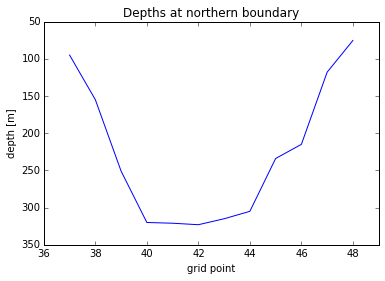

In [14]:
k = range(0,60)
plt.plot(k,bathy[897,k])
plt.gca().invert_yaxis()
plt.xlabel('grid point')
plt.ylabel('depth [m]')
plt.title('Depths at northern boundary')
plt.xlim((36,49))
#so the boundary is from j=37 to j=48 at i=897

Estimate of Thomson x-sectional area in mkm 693.0
Our effective x-sectional area in mkm 856.341797805


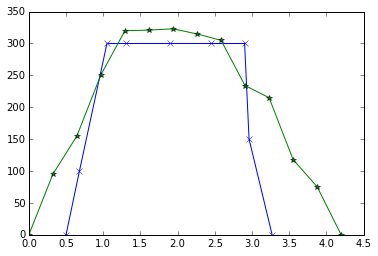

In [15]:
# compare the size of the flux through the Thomson section and the size of the flux through
# our section, remembering that our flux is at 39 degrees to the boundary.
# Start with area
print 'Estimate of Thomson x-sectional area in mkm', 0.55*0.5*300 + (2.4-0.55)*300 + 0.37*300*0.5
dx = 0.4155 # our grid size
dxc = dx*np.cos(39.*np.pi/180.) # corrected for slant of boundary
print 'Our effective x-sectional area in mkm', np.sum(bathy[897,37:48])*dxc
# Thomson bathymetry
thomx = (0, 0.18, 0.55, 0.8, 1.4, 1.95, 2.4, 2.46, 2.77)/np.cos(0)+0.5
thomy = (0, 100, 300, 300, 300, 300, 300, 150, 0)
plt.plot (thomx,thomy,'x-')
# Model bathymetry, corrected for slant
krange = np.arange(0,49-36+1)*dxc
depth = np.zeros(49-36+1)
depth[0:49-36+1] = bathy[897,36:50]
plt.plot (krange,depth,'*-')

In [16]:
# Now estimate flux (M2)
obs_flux = 0.
model_flux = 0.
# Station 5
obs_flux = obs_flux + 0.55 * M2_amp_depth_int[4] * 0.5*300
model_flux = model_flux + sum(depth[0:3] * dx * M2_amp_depth_int[4]*np.cos(39.*np.pi/180.))
# Station 4
obs_flux = obs_flux + (1.1-0.55) * M2_amp_depth_int[3] * 300
model_flux = model_flux + sum(depth[3:5] * dx * M2_amp_depth_int[3]*np.cos(39.*np.pi/180.))
# Station 3
obs_flux = obs_flux + (1.7-1.1) * M2_amp_depth_int[2] * 300
model_flux = model_flux + sum(depth[5:7] * dx * M2_amp_depth_int[2]*np.cos(39.*np.pi/180.))
print M2_amp_depth_int[2]
# Station 2
obs_flux = obs_flux + (2.4-1.7) * M2_amp_depth_int[1] * 300
model_flux = model_flux + sum(depth[7:9] * dx * M2_amp_depth_int[1]*np.cos(39.*np.pi/180.))
# Station 1
obs_flux = obs_flux + (2.77-2.4) * M2_amp_depth_int[0] * 300 * 0.5
model_flux = model_flux + sum(depth[9:13] * dx * M2_amp_depth_int[0]*np.cos(39.*np.pi/180.))
print obs_flux, model_flux, model_flux/obs_flux, 856/693.
print obs_flux/693., model_flux/856.
M2_corr = obs_flux/model_flux
M2_corr = M2_corr*M2_corr #reduce by an extra factor for a better match with observations
print M2_corr

[ 0.373385]
[ 257.164675] 314.773414644 [ 1.22401498] 1.23520923521
[ 0.371089] 0.367725951687
[ 0.66746198]


In [17]:
# And flux K1
obs_flux = 0.
model_flux = 0.
# Station 5
obs_flux = obs_flux + 0.55 * K1_amp_depth_int[4] * 0.5*300
model_flux = model_flux + sum(depth[0:3] * dx * K1_amp_depth_int[4]*np.cos(39.*np.pi/180.))
# Station 4
obs_flux = obs_flux + (1.1-0.55) * K1_amp_depth_int[3] * 300
model_flux = model_flux + sum(depth[3:5] * dx * K1_amp_depth_int[3]*np.cos(39.*np.pi/180.))
# Station 3
obs_flux = obs_flux + (1.7-1.1) * K1_amp_depth_int[2] * 300
model_flux = model_flux + sum(depth[5:7] * dx * K1_amp_depth_int[2]*np.cos(39.*np.pi/180.))
# Station 2
obs_flux = obs_flux + (2.4-1.7) * K1_amp_depth_int[1] * 300
model_flux = model_flux + sum(depth[7:9] * dx * K1_amp_depth_int[1]*np.cos(39.*np.pi/180.))
# Station 1
obs_flux = obs_flux + (2.77-2.4) * K1_amp_depth_int[0] * 300 * 0.5
model_flux = model_flux + sum(depth[9:13] * dx * K1_amp_depth_int[0]*np.cos(39.*np.pi/180.))
print obs_flux, model_flux, model_flux/obs_flux, 856/693.
K1_corr = obs_flux/model_flux
print K1_corr

[ 78.8998] 91.7139880465 [ 1.16241091] 1.23520923521
[ 0.86028099]


So... we have current measurements close to the boundary, but not perfectly aligned with the boundary. But without any other well resolved data west of the NEMO boundary, we can't really interpolate to the boundary location. Plus, there isn't much of a change in tidal amplitudes or phases across the boundary. So just assume that the current measurements represent the currents at the boundary without any interpolation or change.

This is from Susan's notebook (JohnstoneStraitBoundary) where she looked at the boundary

In [18]:
#start and end points
starti = 32
endi = 62
lengthi = endi-starti

So let's assume for currents (Kates original assumptions and Susan's suggestions)

* Station 1 represents cells 47 - 62 (16 cells) -- SEA 45-49, 50-62 (18 cells)

* Station 2 represents cells 44 - 46 (3 cells) --  SEA 43-44 (2 cells)

* Station 3 represents cells 41 - 43 (3 cells) --- SEA 41-42 (2 cells)

* Station 4 represents cells 39 - 40 (2 cells) --- SEA  39-40 (2 cells)

* Station 5 represents cells 32 - 38 (7 cells) --- SEA 32-35, 36-38 (7 cells)

Put all this into some new variables that are the same length as the boundary

<b>This is as far as I have gotten with the corrections.</b> The position of the fluxes, as given by SEA above needs to be corrected.  The impact of the correction from Stn 3 to Stn 4 needs to be propagated.  The currents need to be downgraded by the amount estimated above.

## Nancy's continuation

Plan:

1. Correct the currents and check.
2. Correct grid positioning.
3. Propogate S3-S4 changes through. 



Current corrections:

We adjust the currents by multiplying by the correction factors give above:

$U_{mod} = corr*U_{obs}$

In [19]:


print M2_amp_depth_int

K1_amp_depth_int_corr = K1_corr*K1_amp_depth_int[:];
M2_amp_depth_int_corr = M2_corr*M2_amp_depth_int[:];
print M2_amp_depth_int_corr

[[ 0.284     ]
 [ 0.33910833]
 [ 0.373385  ]
 [ 0.417125  ]
 [ 0.414     ]]
[[ 0.1895592 ]
 [ 0.22634192]
 [ 0.24922029]
 [ 0.27841508]
 [ 0.27632926]]


In [20]:
#Restimate Fluxes
# Now estimate flux (M2)
obs_flux = 0.
model_flux = 0.
# Station 5
obs_flux = obs_flux + 0.55 * M2_amp_depth_int[4] * 0.5*300
model_flux = model_flux + sum(depth[0:3] * dx * M2_amp_depth_int_corr[4]*np.cos(39.*np.pi/180.))
# Station 4
obs_flux = obs_flux + (1.1-0.55) * M2_amp_depth_int[3] * 300
model_flux = model_flux + sum(depth[3:5] * dx * M2_amp_depth_int_corr[3]*np.cos(39.*np.pi/180.))
# Station 3
obs_flux = obs_flux + (1.7-1.1) * M2_amp_depth_int[2] * 300
model_flux = model_flux + sum(depth[5:7] * dx * M2_amp_depth_int_corr[2]*np.cos(39.*np.pi/180.))
# Station 2
obs_flux = obs_flux + (2.4-1.7) * M2_amp_depth_int[1] * 300
model_flux = model_flux + sum(depth[7:9] * dx * M2_amp_depth_int_corr[1]*np.cos(39.*np.pi/180.))
# Station 1
obs_flux = obs_flux + (2.77-2.4) * M2_amp_depth_int[0] * 300 * 0.5
model_flux = model_flux + sum(depth[9:13] * dx * M2_amp_depth_int_corr[0]*np.cos(39.*np.pi/180.))
print obs_flux, model_flux, model_flux/obs_flux, 856/693.
print obs_flux/693., model_flux/856.

[ 257.164675] 210.099287269 [ 0.81698347] 1.23520923521
[ 0.371089] 0.245443092603


In [21]:
# And flux K1
obs_flux = 0.
model_flux = 0.
# Station 5
obs_flux = obs_flux + 0.55 * K1_amp_depth_int[4] * 0.5*300
model_flux = model_flux + sum(depth[0:3] * dx * K1_amp_depth_int_corr[4]*np.cos(39.*np.pi/180.))
# Station 4
obs_flux = obs_flux + (1.1-0.55) * K1_amp_depth_int[3] * 300
model_flux = model_flux + sum(depth[3:5] * dx * K1_amp_depth_int_corr[3]*np.cos(39.*np.pi/180.))
# Station 3
obs_flux = obs_flux + (1.7-1.1) * K1_amp_depth_int[2] * 300
model_flux = model_flux + sum(depth[5:7] * dx * K1_amp_depth_int_corr[2]*np.cos(39.*np.pi/180.))
# Station 2
obs_flux = obs_flux + (2.4-1.7) * K1_amp_depth_int[1] * 300
model_flux = model_flux + sum(depth[7:9] * dx * K1_amp_depth_int_corr[1]*np.cos(39.*np.pi/180.))
# Station 1
obs_flux = obs_flux + (2.77-2.4) * K1_amp_depth_int[0] * 300 * 0.5
model_flux = model_flux + sum(depth[9:13] * dx * K1_amp_depth_int_corr[0]*np.cos(39.*np.pi/180.))
print obs_flux, model_flux, model_flux/obs_flux, 856/693.

[ 78.8998] 78.8998 [ 1.] 1.23520923521


The model and observed fluxes match now. Note that there are likely some integration errors in calculating the fluxes but we probably don't have to worry because these are estimates anways. 

Now, correct the positioning based on Susn's corrections. Make sure  use the new array for corrected depth integrated currents.


## Fine Tuning

So above is correct theoretically, but now given the model results, lets do some fine tuning.  Based on the run tide_M2phase, the average Kelsey Bay/Yorke Island M2 amplitudes are 3.4% high and the phase is 8.2 degrees low.  Add these corrections: here to the velocities and below to the elevations.

In [22]:
M2_amp_finecorrection = 0.953
M2_pha_finecorrection = 5.7
K1_amp_finecorrection = 0.764
K1_pha_finecorrection = 28.4
M2_amp_depth_int_corr = M2_amp_depth_int_corr*M2_amp_finecorrection
M2_pha_depth_int = M2_pha_depth_int + M2_pha_finecorrection
K1_amp_depth_int_corr = K1_amp_depth_int_corr*K1_amp_finecorrection
K1_pha_depth_int = K1_pha_depth_int + K1_pha_finecorrection

In [23]:
#K1 current amplitude
amp_K1_bound = np.zeros((lengthi,1))
amp_K1_bound[0:7,0]   = K1_amp_depth_int_corr[5-1,0]
amp_K1_bound[7:9,0]   = K1_amp_depth_int_corr[4-1,0]
amp_K1_bound[9:11,0]  = K1_amp_depth_int_corr[3-1,0]
amp_K1_bound[11:13,0] = K1_amp_depth_int_corr[2-1,0]
amp_K1_bound[13:,0]   = K1_amp_depth_int_corr[1-1,0]

#K1 current phase
pha_K1_bound = np.zeros((lengthi,1))
pha_K1_bound[0:7,0]   = K1_pha_depth_int[5-1,0]
pha_K1_bound[7:9,0]   = K1_pha_depth_int[4-1,0]
pha_K1_bound[9:11,0]  = K1_pha_depth_int[3-1,0]
pha_K1_bound[11:13,0] = K1_pha_depth_int[2-1,0]
pha_K1_bound[13:,0]   = K1_pha_depth_int[1-1,0]

#M2 current amplitude
amp_M2_bound = np.zeros((lengthi,1))
amp_M2_bound[0:7,0]   = M2_amp_depth_int_corr[5-1,0]
amp_M2_bound[7:9,0]   = M2_amp_depth_int_corr[4-1,0]
amp_M2_bound[9:11,0]  = M2_amp_depth_int_corr[3-1,0]
amp_M2_bound[11:13,0] = M2_amp_depth_int_corr[2-1,0]
amp_M2_bound[13:,0]   = M2_amp_depth_int_corr[1-1,0]

#M2 current phase
pha_M2_bound = np.zeros((lengthi,1))
pha_M2_bound[0:7,0]   = M2_pha_depth_int[5-1,0]
pha_M2_bound[7:9,0]   = M2_pha_depth_int[4-1,0]
pha_M2_bound[9:11,0]  = M2_pha_depth_int[3-1,0]
pha_M2_bound[11:13,0] = M2_pha_depth_int[2-1,0]
pha_M2_bound[13:,0]   = M2_pha_depth_int[1-1,0]


Now, as noted in the text of Thomson & Huggett (1980), the current amplitudes are in the along-strait direction. Across-strait currents are assumed to be negligible. From the direction of the mean currents, the average along-strait direction is approximately 170 degrees/350 degrees, measured counter-clockwise from east. 

So, we must convert the along-strait amplitude and phase into u and v amplitude and phase relative for NEMO. This means that we must rotate them because NEMO wants velocities relative to its grid orientation (not North South).

Following the approach used to rotate the Webtide tidal constituents, we can do the following:

* assume the postive along strait direction is approximately 10 degrees measured clockwise from East
* 'up' in NEMO is rotated 29 degrees counter-clockwise of North
* 'across' in NEMO is rotated 29 degrees counter-clockwise of East
* the angle of rotation between along-strait direction and 'across' in NEMO is therefore $\theta = 29^\circ +10^\circ=39^\circ$
* neglect across-strait velocity (i.e. $v_a = 0$, $\phi_v = 0$)
* $u_a$ and $\phi_u$ are the depth averaged amplitude and phase at each station (calculated above)
* following the approach described in the docs (docs/tides/tides_data_acquisition):
    
    so for U: 

    $Z1 = u_a\cos\theta\cos\phi_u$ 
    
    $Z2 = u_a\cos\theta\sin\phi_u$
    
    and for V: 

    $Z1 = -u_a\sin\theta\cos\phi_u$ 
    
    $Z2 = -u_a\sin\theta\sin\phi_u$

In [32]:
theta = 39

#for K1 currents
UZ1_K1 =  amp_K1_bound*np.cos(np.radians(theta))*np.cos(np.radians(pha_K1_bound))
UZ2_K1 =  amp_K1_bound*np.cos(np.radians(theta))*np.sin(np.radians(pha_K1_bound))
VZ1_K1 = -amp_K1_bound*np.sin(np.radians(theta))*np.cos(np.radians(pha_K1_bound)) 
VZ2_K1 = -amp_K1_bound*np.sin(np.radians(theta))*np.sin(np.radians(pha_K1_bound))

#for M2 currents
UZ1_M2 =  amp_M2_bound*np.cos(np.radians(theta))*np.cos(np.radians(pha_M2_bound))
UZ2_M2 =  amp_M2_bound*np.cos(np.radians(theta))*np.sin(np.radians(pha_M2_bound))
VZ1_M2 = -amp_M2_bound*np.sin(np.radians(theta))*np.cos(np.radians(pha_M2_bound)) 
VZ2_M2 = -amp_M2_bound*np.sin(np.radians(theta))*np.sin(np.radians(pha_M2_bound))

[[ 0.05699677]
 [ 0.05699677]
 [ 0.05699677]
 [ 0.05699677]
 [ 0.05699677]
 [ 0.05699677]
 [ 0.05699677]
 [-0.0173956 ]
 [-0.0173956 ]
 [-0.01445693]
 [-0.01445693]
 [-0.02183368]
 [-0.02183368]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]
 [ 0.03984354]]


And let's assume for surface elevation that the whole boundary is represented by the average between TGN and TGS. 

Then convert the amplitude and phase into cosine and sine format that NEMO likes.

In [25]:
#K1 surface elevation 
elev_amp_K1 = np.mean([TGN_Jun['K1amp'],TGS_Feb['K1amp'],TGS_Jun['K1amp']])*K1_amp_finecorrection
elev_pha_K1 = np.mean([TGN_Jun['K1pha_GMT'],TGS_Feb['K1pha_GMT'],
                       TGS_Jun['K1pha_GMT']]) + K1_amp_finecorrection
Z1_K1 = elev_amp_K1*np.cos(np.radians(elev_pha_K1))       
Z2_K1 = elev_amp_K1*np.sin(np.radians(elev_pha_K1))

#M2 surface elevation 
elev_amp_M2 = np.mean([TGN_Jun['M2amp'],TGS_Feb['M2amp'],TGS_Jun['M2amp']])*M2_amp_finecorrection
elev_pha_M2 = np.mean([TGN_Jun['M2pha_GMT'],TGS_Feb['M2pha_GMT'],
                       TGS_Jun['M2pha_GMT']]) + M2_pha_finecorrection
Z1_M2 = elev_amp_M2*np.cos(np.radians(elev_pha_M2))       
Z2_M2 = elev_amp_M2*np.sin(np.radians(elev_pha_M2))

print elev_amp_M2, Z1_M2, Z2_M2
print Z2_M2**2/(UZ1_M2**2+UZ2_M2**2+VZ1_M2**2+VZ2_M2**2)*9.8
print Z2_K1**2/(UZ1_K1**2+UZ2_K1**2+VZ1_K1**2+VZ2_K1**2)*9.8

1.15948333333 0.0967015767395 -1.15544381314
[[ 188.66189287]
 [ 188.66189287]
 [ 188.66189287]
 [ 188.66189287]
 [ 188.66189287]
 [ 188.66189287]
 [ 188.66189287]
 [ 185.8456629 ]
 [ 185.8456629 ]
 [ 231.93758754]
 [ 231.93758754]
 [ 281.19522716]
 [ 281.19522716]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]
 [ 400.91120053]]
[[  513.49255312]
 [  513.49255312]
 [  513.49255312]
 [  513.49255312]
 [  513.49255312]
 [  513.49255312]
 [  513.49255312]
 [  201.32110015]
 [  201.32110015]
 [  281.7438385 ]
 [  281.7438385 ]
 [  301.31235573]
 [  301.31235573]
 [ 1415.62347146]
 [ 1415.62347146]
 [ 1415.62347146]
 [ 1415.62347146]
 [ 1415.62347146]
 [ 1415.62347146]
 [ 1415.62347146]
 [ 1415.62347146]
 [ 1415.62347146]
 [ 1415.62347146]
 [ 1415.62347146]
 [ 1415.6234

Start to make the netcdf file

In [26]:
reload(webtide_tools)
#wait.... what about the U and V being on different grids?
#.... nothing really changes because we don't have great spatial resolution of measurements...
#... perhaps we'll need to make an extra cell for the V grid....
#currents
webtide_tools.create_northern_tides(UZ1_K1,UZ2_K1,'U','K1', 'TS1')
webtide_tools.create_northern_tides(VZ1_K1,VZ2_K1,'V','K1','TS1')
webtide_tools.create_northern_tides(UZ1_M2,UZ2_M2,'U','M2', 'TS1')
webtide_tools.create_northern_tides(VZ1_M2,VZ2_M2,'V','M2', 'TS1')
#surface elevation 
webtide_tools.create_northern_tides(Z1_K1,Z2_K1,'T','K1', 'TS1')
webtide_tools.create_northern_tides(Z1_M2,Z2_M2,'T','M2', 'TS1')

file format: NETCDF4
Conventions: CF-1.6
title: Tidal Boundary Conditions for Northern Boundary
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: https://bitbucket.org/salishsea/tools/src/tip/johnstone_strait_tides.ipynb
references: https://bitbucket.org/salishsea/nemo-forcing/src/tip/open_boundaries/north/SalishSea2_North_tide_K1_grid_U.nc
history: [2015-11-06 16:05:21] Created netCDF4 zlib=True dataset.
comment: Tidal current and amplitude data from Thomson & Huggett 1980
(1, 30)
file format: NETCDF4
Conventions: CF-1.6
title: Tidal Boundary Conditions for Northern Boundary
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: https://bitbucket.org/salishsea/tools/src/tip/johnstone_strait_tides.ipynb
references: https://bitbucket.org/salishsea/nemo-forcing/src/tip/open_boundaries/north/SalishSea2_North_tide_K1_grid_V.nc
history: [2015-11-06 16:05:21] Created netCDF4 zlib=True dataset.
comment: T

In [27]:
#test = NC.Dataset('/ocean/klesouef/meopar/tools/I_ForcingFiles/Tides/SalishSea2_North_tide_M2_grid_V.nc','r')
test = NC.Dataset('SalishSea2_corrF_North_tide_M2_grid_U.nc','r')
print test.variables['u1'][:]
test.close()

[[-0.06285332 -0.06285332 -0.06285332 -0.06285332 -0.06285332 -0.06285332
  -0.06285332  0.03085715  0.03085715  0.02623218  0.02623218  0.03465951
   0.03465951 -0.04406371 -0.04406371 -0.04406371 -0.04406371 -0.04406371
  -0.04406371 -0.04406371 -0.04406371 -0.04406371 -0.04406371 -0.04406371
  -0.04406371 -0.04406371 -0.04406371 -0.04406371 -0.04406371 -0.04406371]]


In [28]:
test = NC.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/open_boundaries/north/tides/SalishSea2_North_tide_M2_grid_U.nc','r')
print test.variables['u1'][:]
test.close()

[[-0.14011116 -0.14011116 -0.14011116 -0.14011116 -0.14011116 -0.14011116
  -0.14011116 -0.00385936 -0.00385936 -0.00075727 -0.00075727 -0.00075727
   0.01634435  0.01634435  0.01634435 -0.09749961 -0.09749961 -0.09749961
  -0.09749961 -0.09749961 -0.09749961 -0.09749961 -0.09749961 -0.09749961
  -0.09749961 -0.09749961 -0.09749961 -0.09749961 -0.09749961 -0.09749961]]


Now, remake the tides in the johnstone_strait_contd notebook.